In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from nightscout import Nightscout
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!ls -lah


total 352K
drwxrwxr-x 7 1000 1000 4.0K Jul 18 02:52 .
drwxr-xr-x 1 root root 4.0K Jul 20 02:09 ..
-rw-rw-r-- 1 1000 1000   87 Jul 18 01:22 .env
drwxr-xr-x 2 root root 4.0K Jul 18 01:20 .ipynb_checkpoints
drwxr-xr-x 2 root root 4.0K Jul 20 02:19 __pycache__
drwxrwxr-x 2 1000 1000 4.0K Jul 17 23:40 docker-jupyter
-rw-rw-r-- 1 1000 1000 305K Jul 18 02:52 example.ipynb
drwxr-xr-x 3 root root 4.0K Jul 18 01:11 firmware
-rw-rw-r-- 1 1000 1000 1.4K Jul 20 02:19 nightscout.py
-rw-rw-r-- 1 1000 1000  144 Jul 18 01:16 requirements.txt
-rwxrwxr-x 1 1000 1000  230 Jul 20 02:09 run_jupyter.sh
drwxr-xr-x 2 root root 4.0K Jul 18 01:11 x86_64-linux-gnu


In [13]:
ns = Nightscout()
data = ns.find()

In [12]:
ns.treatments

!cache miss, fetching from db


,_id,enteredBy,eventType,carbs,protein,insulin,created_at,utcOffset,boluscalc,glucose,...,insulinType,absorptionTime,userEnteredAt,foodType,programmed,type,unabsorbed,reason,correctionRange,insulinNeedsScaleFactor
0,618fd6d43af1cd96a593beec,patrick,Meal Bolus,49.0,0,3.50,2021-11-13T14:24:00.000Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,618fe9ff3af1cd96a593cfca,patrick,Bolus Wizard,55.0,NaN,4.00,2021-11-13T16:38:23.854Z,0,"{'profile': 's', 'eventTime': '2021-11-13T16:3...",112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61900b743af1cd96a593ebba,patrick,Carb Correction,8.0,NaN,NaN,2021-11-13T19:01:04.661Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61900b993af1cd96a593ebd2,patrick,Exercise,NaN,NaN,NaN,2021-11-13T19:01:43.118Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61901c013af1cd96a593f80d,patrick,Bolus Wizard,30.5,NaN,2.65,2021-11-13T20:11:45.360Z,0,"{'profile': 's', 'eventTime': '2021-11-13T20:1...",137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8195,64b8721a0d7e1da6a28d270d,loop://iPhone,Temp Basal,NaN,NaN,NaN,2023-07-19T23:30:33.000Z,0,NaN,NaN,...,Humalog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8196,64b876c70d7e1da6a28d2b2f,loop://iPhone,Temp Basal,NaN,NaN,NaN,2023-07-19T23:50:31.000Z,0,NaN,NaN,...,Humalog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8197,64b8770f0d7e1da6a28d2b79,loop://iPhone,Carb Correction,6.0,NaN,NaN,2023-07-19T23:51:17.000Z,0,NaN,NaN,...,NaN,180.0,2023-07-19T23:51:38Z,🌮,NaN,NaN,NaN,NaN,NaN,NaN
8198,64b877100d7e1da6a28d2b7e,loop://iPhone,Correction Bolus,NaN,NaN,0.20,2023-07-19T23:51:44.000Z,0,NaN,NaN,...,Humalog,NaN,NaN,NaN,0.2,normal,0.0,NaN,NaN,NaN


In [11]:
ns.entries

,_id,sgv,date,dateString,trend,direction,device,type,utcOffset,sysTime,trendRate,isCalibration,mbg
0,61880a4b3af1cd96a58efb05,117.0,1.636305e+12,2021-11-07T17:13:57.000Z,4,Flat,share2,sgv,0,2021-11-07T17:13:57.000Z,NaN,NaN,NaN
1,61880a4b3af1cd96a58efb06,115.0,1.636305e+12,2021-11-07T17:08:57.000Z,4,Flat,share2,sgv,0,2021-11-07T17:08:57.000Z,NaN,NaN,NaN
2,61880a4b3af1cd96a58efb08,118.0,1.636305e+12,2021-11-07T17:03:56.000Z,4,Flat,share2,sgv,0,2021-11-07T17:03:56.000Z,NaN,NaN,NaN
3,61880af33af1cd96a58efbab,115.0,1.636306e+12,2021-11-07T17:18:56.000Z,4,Flat,share2,sgv,0,2021-11-07T17:18:56.000Z,NaN,NaN,NaN
4,61880c1e3af1cd96a58efc52,116.0,1.636306e+12,2021-11-07T17:23:57.000Z,4,Flat,share2,sgv,0,2021-11-07T17:23:57.000Z,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180065,64b88d0a0d7e1da6a28d3eb1,113.0,1.689816e+12,2023-07-20T01:25:15.000Z,4,Flat,share2,sgv,0,2023-07-20T01:25:15.000Z,NaN,NaN,NaN
180066,64b88e380d7e1da6a28d3fb9,113.0,1.689817e+12,2023-07-20T01:30:15.000Z,4,Flat,share2,sgv,0,2023-07-20T01:30:15.000Z,NaN,NaN,NaN
180067,64b88f600d7e1da6a28d40c0,105.0,1.689817e+12,2023-07-20T01:35:15.000Z,4,Flat,share2,sgv,0,2023-07-20T01:35:15.000Z,NaN,NaN,NaN
180068,64b8908d0d7e1da6a28d41d9,102.0,1.689817e+12,2023-07-20T01:40:15.000Z,4,Flat,share2,sgv,0,2023-07-20T01:40:15.000Z,NaN,NaN,NaN


<Axes: >

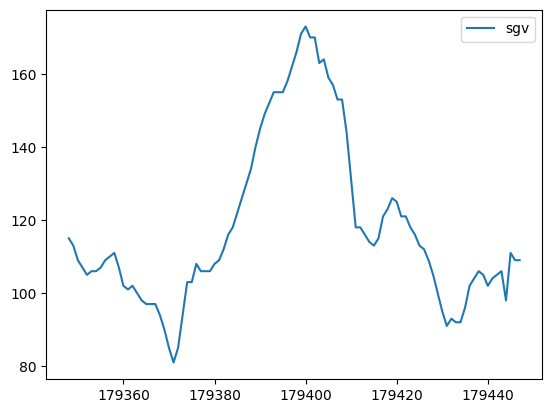

In [6]:
data[-100:][['sgv']].plot()

<Axes: >

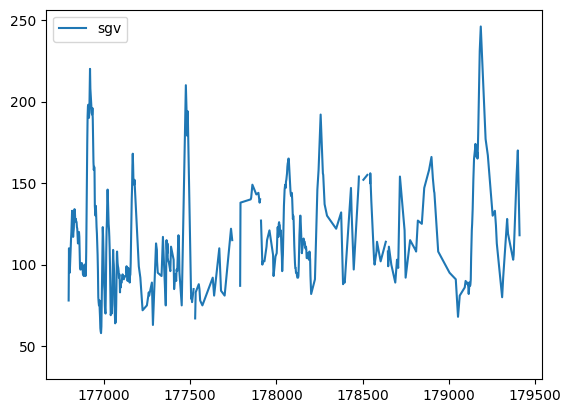

In [7]:
data[data['device']=='loop://Dexcom/G6/21.0'][['sgv']][-500:].plot()

<Axes: >

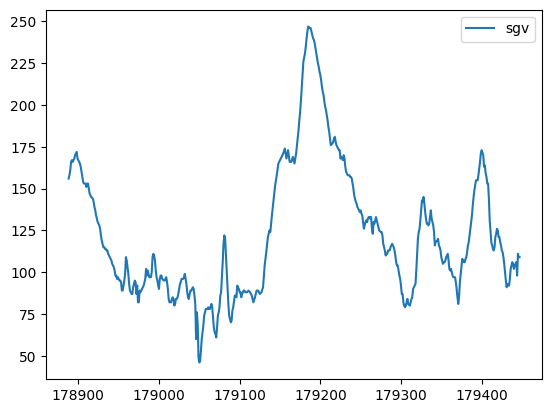

In [8]:
data[data['device']!='loop://Dexcom/G6/21.0'][['sgv']][-500:].plot()

In [10]:
data[data['device']=='loop://Dexcom/G6/21.0'][-4000:]


,_id,sgv,date,dateString,trend,direction,device,type,utcOffset,sysTime,trendRate,isCalibration,mbg
164775,647f027905264c5abfc3a3ee,103.0,1.686044e+12,2023-06-06T09:39:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T09:39:47.000Z,-0.3,False,NaN
164792,647f140505264c5abfc3ac31,103.0,1.686050e+12,2023-06-06T11:09:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T11:09:47.000Z,0.0,False,NaN
164823,647f372f05264c5abfc3bce7,126.0,1.686059e+12,2023-06-06T13:39:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T13:39:47.000Z,0.8,False,NaN
164864,647f660f05264c5abfc3d440,81.0,1.686071e+12,2023-06-06T16:59:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T16:59:47.000Z,-0.6,False,NaN
164873,647f6f6e05264c5abfc3d91d,117.0,1.686073e+12,2023-06-06T17:39:47.000Z,3,FortyFiveUp,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T17:39:47.000Z,1.5,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179374,64b59a570d7e1da6a28aa303,103.0,1.689623e+12,2023-07-17T19:45:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T19:45:14.000Z,0.8,False,NaN
179377,64b59caf0d7e1da6a28aa4e6,106.0,1.689624e+12,2023-07-17T19:55:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T19:55:14.000Z,0.7,False,NaN
179394,64b5af700d7e1da6a28ab3b4,155.0,1.689629e+12,2023-07-17T21:15:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T21:15:14.000Z,0.6,False,NaN
179401,64b5b6780d7e1da6a28ab98e,170.0,1.689630e+12,2023-07-17T21:45:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T21:45:14.000Z,0.3,False,NaN


In [27]:
treatments = ns.find(collection='treatments')
treatments.columns

Index(['_id', 'enteredBy', 'eventType', 'carbs', 'protein', 'insulin',
       'created_at', 'utcOffset', 'boluscalc', 'glucose', 'glucoseType',
       'units', 'notes', 'duration', 'splitNow', 'splitExt', 'amount',
       'absolute', 'syncIdentifier', 'automatic', 'rate', 'timestamp', 'temp',
       'insulinType', 'absorptionTime', 'userEnteredAt', 'foodType',
       'programmed', 'type', 'unabsorbed', 'reason', 'correctionRange',
       'insulinNeedsScaleFactor'],
      dtype='object')

In [47]:
food = treatments[treatments['carbs'] > 0]
food[['carbs','insulin','created_at' , 'timestamp']]

,carbs,insulin,created_at,timestamp
0,49.0,3.50,2021-11-13T14:24:00.000Z,NaN
1,55.0,4.00,2021-11-13T16:38:23.854Z,NaN
2,8.0,NaN,2021-11-13T19:01:04.661Z,NaN
4,30.5,2.65,2021-11-13T20:11:45.360Z,NaN
5,60.0,3.50,2021-11-13T23:28:16.721Z,NaN
...,...,...,...,...
7886,9.0,NaN,2023-07-17T13:16:37.000Z,2023-07-17T13:16:37Z
7893,9.0,NaN,2023-07-17T15:07:27.000Z,2023-07-17T15:07:27Z
7913,46.0,NaN,2023-07-17T19:01:45.000Z,2023-07-17T19:01:45Z
7933,40.0,NaN,2023-07-17T23:25:39.000Z,2023-07-17T23:25:39Z


In [56]:
pd.set_option('display.max_rows', None)

data[-200:]

,_id,sgv,date,dateString,trend,direction,device,type,utcOffset,sysTime,trendRate,isCalibration,mbg
179248,64b510120d7e1da6a28a37e8,137.0,1.689588e+12,2023-07-17T09:55:14.000Z,4,Flat,share2,sgv,0,2023-07-17T09:55:14.000Z,NaN,NaN,NaN
179249,64b5113b0d7e1da6a28a38b5,136.0,1.689588e+12,2023-07-17T10:00:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:00:14.000Z,NaN,NaN,NaN
179250,64b512670d7e1da6a28a3994,137.0,1.689588e+12,2023-07-17T10:05:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:05:13.000Z,NaN,NaN,NaN
179251,64b513930d7e1da6a28a3a75,135.0,1.689589e+12,2023-07-17T10:10:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:10:14.000Z,NaN,NaN,NaN
179252,64b514be0d7e1da6a28a3b61,134.0,1.689589e+12,2023-07-17T10:15:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:15:14.000Z,NaN,NaN,NaN
179253,64b515ef0d7e1da6a28a3c42,130.0,1.689589e+12,2023-07-17T10:20:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:20:14.000Z,NaN,NaN,NaN
179254,64b517170d7e1da6a28a3d10,126.0,1.689590e+12,2023-07-17T10:25:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:25:13.000Z,NaN,NaN,NaN
179255,64b518440d7e1da6a28a3dde,130.0,1.689590e+12,2023-07-17T10:30:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T10:30:14.000Z,-0.2,False,NaN
179256,64b5186c0d7e1da6a28a3e07,130.0,1.689590e+12,2023-07-17T10:30:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:30:13.000Z,NaN,NaN,NaN
179257,64b5196f0d7e1da6a28a3ebe,131.0,1.689590e+12,2023-07-17T10:35:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:35:13.000Z,NaN,NaN,NaN
